In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 906D-4371

 Directory of C:\Users\Lenovo\Documents\ML__Loan(Approval)

29-07-2025  04:23    <DIR>          .
29-07-2025  04:23    <DIR>          ..
29-07-2025  04:03    <DIR>          .ipynb_checkpoints
29-07-2025  04:13    <DIR>          csv_file
29-07-2025  04:15    <DIR>          EDA_ghraph
29-07-2025  04:23            38,022 loan_approved.csv
29-07-2025  03:47           701,264 ML_Logisticgression.ipynb
               2 File(s)        739,286 bytes
               5 Dir(s)  49,639,989,248 bytes free


In [3]:
df=pd.read_csv("loan_approved.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.drop(["Loan_ID","Married",'Credit_History'],axis=1,inplace=True)

In [9]:
df.isnull().sum()


Gender                    13
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [10]:
## filling value 
df['LoanAmount'].fillna(df["LoanAmount"].mode()[0],inplace=True)
df['Self_Employed'].fillna(df["Self_Employed"].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df["Loan_Amount_Term"].median(),inplace=True)

df.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7592\1373097188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df["LoanAmount"].mode()[0],inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7592\1373097188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Gender                    13
Dependents                15
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
print(df['Loan_Status (Approved)'].value_counts())  # proportions


Loan_Status (Approved)
Y    405
N    181
Name: count, dtype: int64


## Exploratory Data Analysis

In [35]:
#Uniariate Analysis
df.head()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status (Approved)
0,Male,0,Graduate,No,5849,0.0,120.0,360.0,Urban,Y
1,Male,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,Male,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y


Text(0.5, 1.0, 'Loan Approved(cnt)')

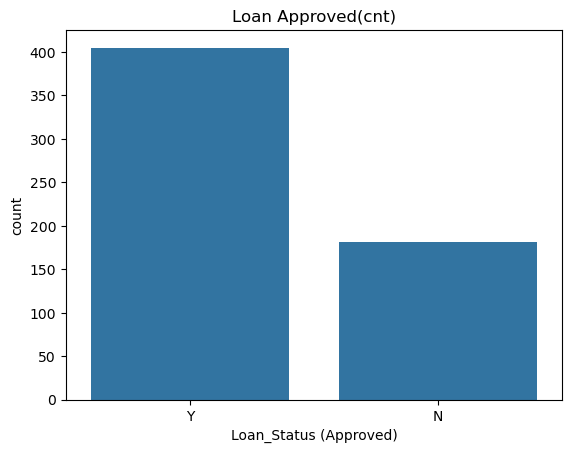

In [21]:
sns.countplot(x="Loan_Status (Approved)",data=df)
plt.title("Loan Approved(cnt)")

In [37]:
print('\t',df["Gender"].value_counts()) 
print('\t',df['Education'].value_counts())

	 Gender
Male      477
Female    109
Name: count, dtype: int64
	 Education
Graduate        457
Not Graduate    129
Name: count, dtype: int64


Text(0.5, 1.0, 'cnt of Employe_Status')

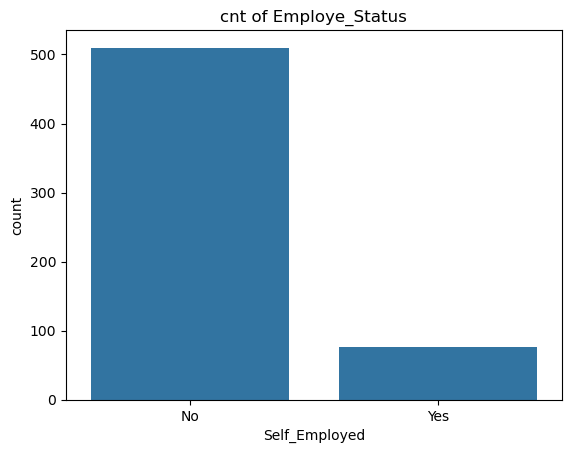

In [38]:
sns.countplot(x="Self_Employed",data=df)
plt.title('cnt of Employe_Status')

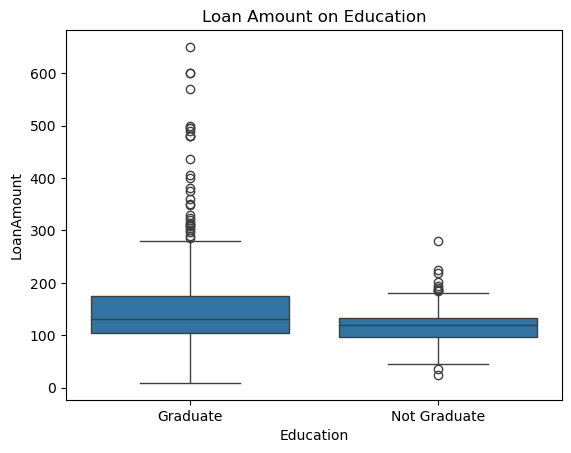

In [40]:
sns.boxplot(x="Education",y="LoanAmount",data=df)
plt.title('Loan Amount on Education')
plt.show()

Text(0.5, 1.0, 'Loan Terms')

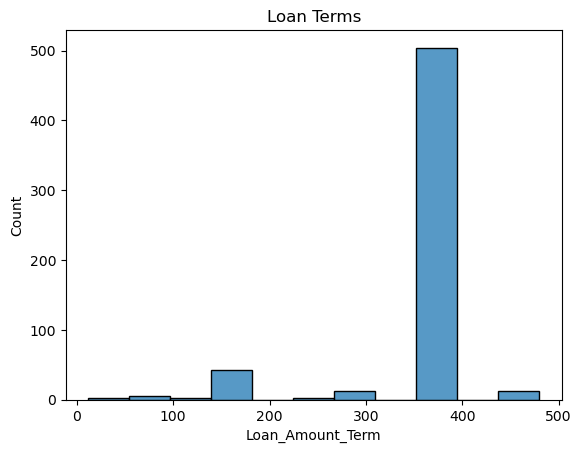

In [25]:
sns.histplot(x="Loan_Amount_Term",data=df)
plt.title("Loan Terms")

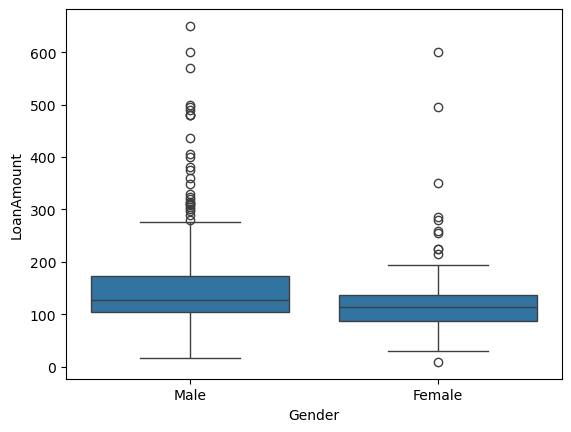

In [23]:
sns.boxplot(x="Gender",y="LoanAmount",data=df)
plt.show()

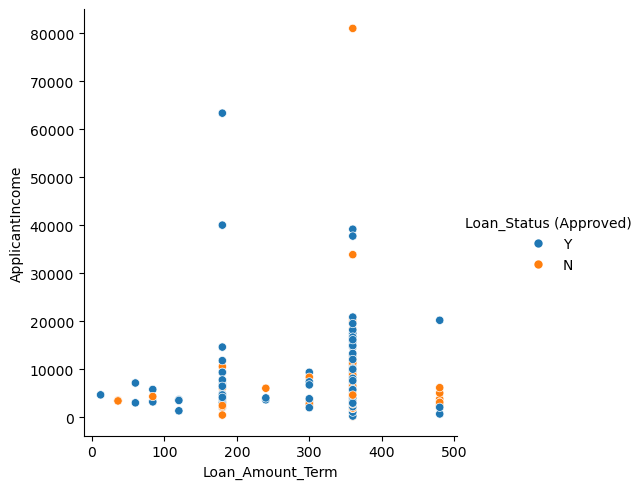

In [30]:

sns.relplot(x="Loan_Amount_Term",y="ApplicantIncome",hue="Loan_Status (Approved)",data=df)
plt.show()

Text(0.5, 1.0, 'Applicant Loan Amount on Income')

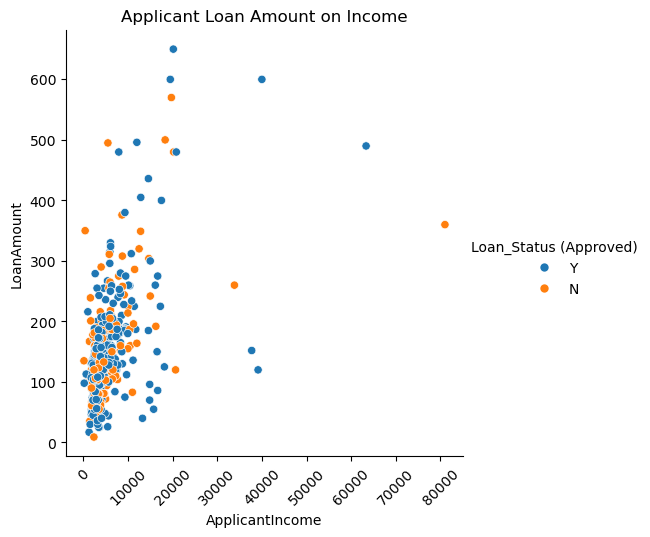

In [44]:
sns.relplot(x="ApplicantIncome",y="LoanAmount",hue='Loan_Status (Approved)',data=df)
plt.xticks(rotation=45)
plt.title("Applicant Loan Amount on Income")

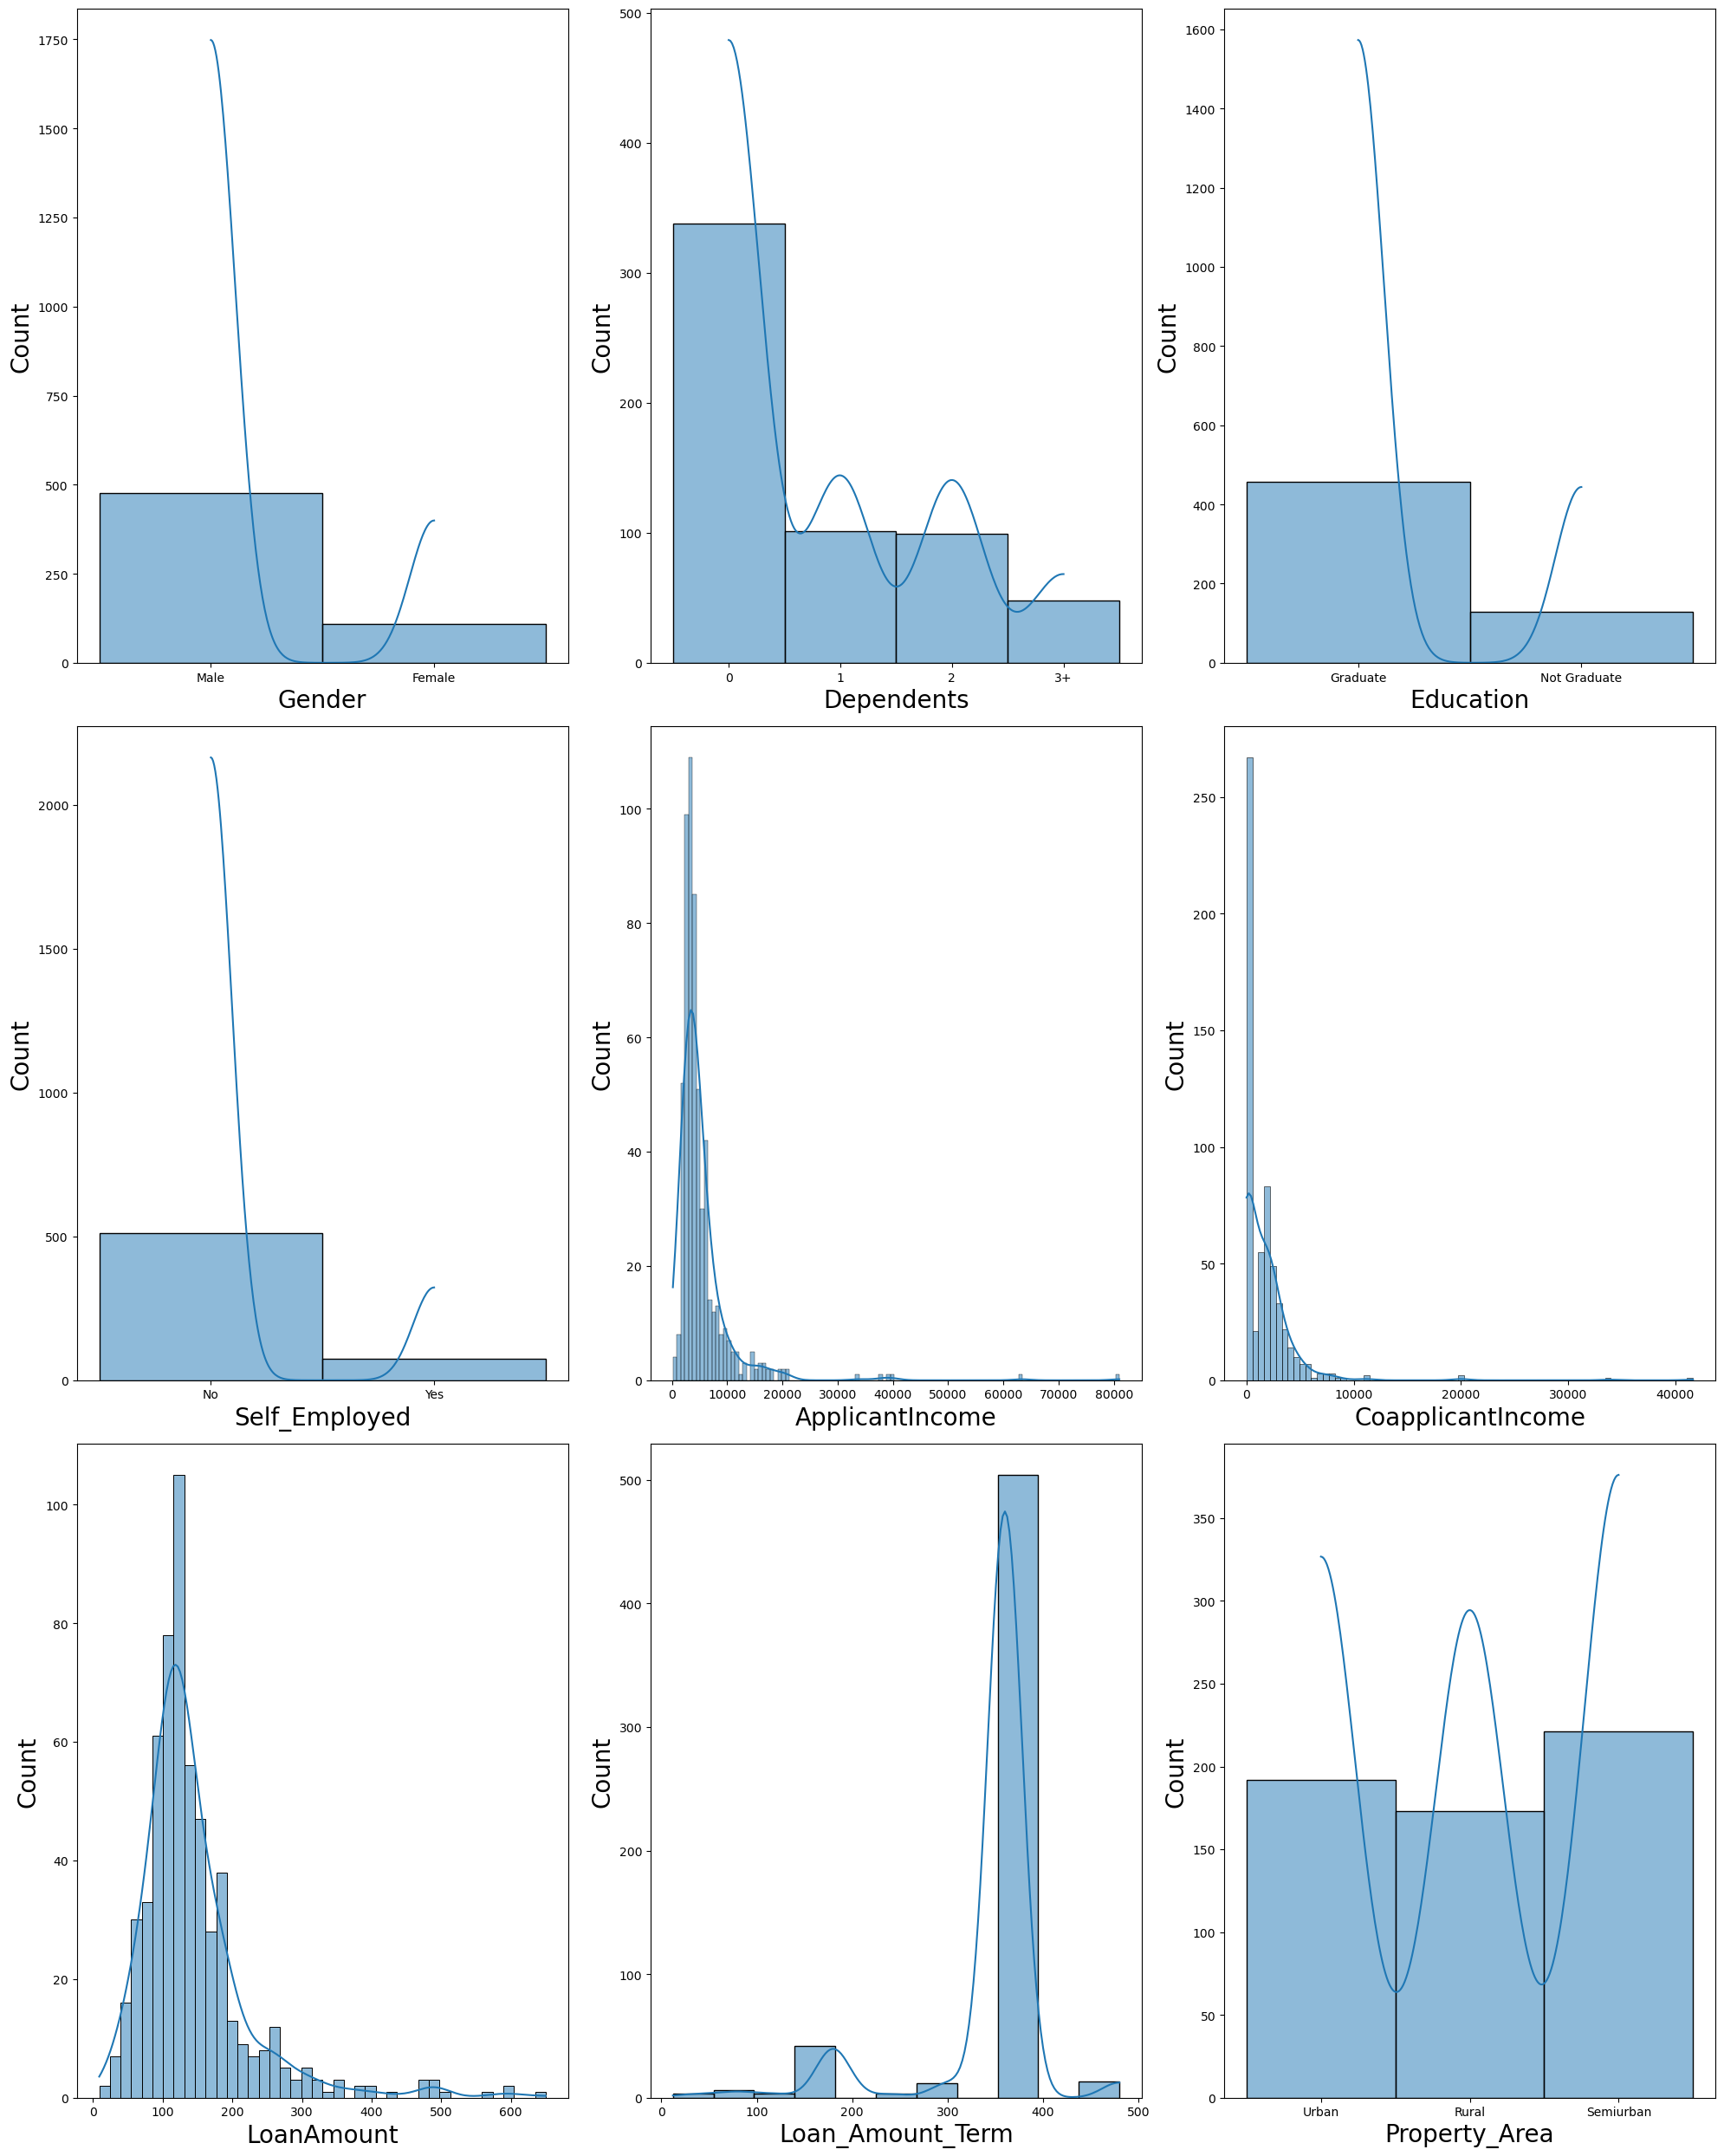

In [26]:
#Outlier
import matplotlib.pyplot as plt
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
df['LoanAmount'].isnull() .sum()

0

In [28]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3208\2294035902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [29]:
df['LoanAmount'].isnull() .sum()

0

In [30]:
df['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    504
180.0     42
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

## Encoding

In [31]:
df.head()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status (Approved)
0,Male,0,Graduate,No,5849,0.0,120.0,360.0,Urban,Y
1,Male,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,Male,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lb=LabelEncoder()
df.Gender=lb.fit_transform(df["Gender"])

In [34]:
df.Education=lb.fit_transform(df['Education'])

In [35]:
df.Self_Employed=lb.fit_transform(df['Self_Employed'])

In [36]:
df.Property_Area=lb.fit_transform(df['Property_Area'])

In [37]:
df.rename({'Loan_Status (Approved)':"loan_approval"},axis=1,inplace=True)
df.loan_approval=lb.fit_transform(df['loan_approval'])

In [38]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [39]:
df.dtypes

Gender                 int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Property_Area          int32
loan_approval          int32
dtype: object

In [40]:
df.Dependents.replace('3+',3,inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3208\2421606134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Dependents.replace('3+',3,inplace=True)


## Feature selection 

<Axes: >

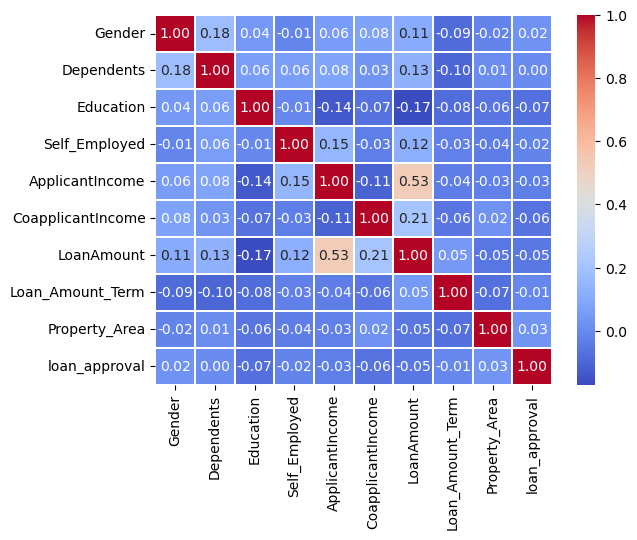

In [70]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidth=0.2,fmt='.2f')

In [42]:
df.corr()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,loan_approval
Gender,1.000000,0.175970,0.042284,-0.011272,0.057651,0.080421,0.105083,-0.087976,-0.019276,0.022143
Dependents,0.175970,1.000000,0.059227,0.058245,0.084485,0.034596,0.127993,-0.102076,0.007816,0.003048
Education,0.042284,0.059227,1.000000,-0.008954,-0.137397,-0.067919,-0.170757,-0.080032,-0.058406,-0.072697
Self_Employed,-0.011272,0.058245,-0.008954,1.000000,0.147910,-0.029266,0.121117,-0.027913,-0.035197,-0.016772
ApplicantIncome,0.057651,0.084485,-0.137397,0.147910,1.000000,-0.109287,0.525672,-0.037993,-0.025715,-0.029172
CoapplicantIncome,0.080421,0.034596,-0.067919,-0.029266,-0.109287,1.000000,0.207966,-0.060881,0.023244,-0.061647
LoanAmount,0.105083,0.127993,-0.170757,0.121117,0.525672,0.207966,1.000000,0.046532,-0.054867,-0.048988
Loan_Amount_Term,-0.087976,-0.102076,-0.080032,-0.027913,-0.037993,-0.060881,0.046532,1.000000,-0.071562,-0.009121
Property_Area,-0.019276,0.007816,-0.058406,-0.035197,-0.025715,0.023244,-0.054867,-0.071562,1.000000,0.032171
loan_approval,0.022143,0.003048,-0.072697,-0.016772,-0.029172,-0.061647,-0.048988,-0.009121,0.032171,1.000000


In [43]:
df

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,loan_approval
0,1,0,0,0,5849,0.0,120.0,360.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,2,1


In [44]:
#creating independent and dependent 
X=df.iloc[:,:-1]
y=df.loan_approval

In [45]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_approval, Length: 586, dtype: int32

In [46]:
#creating training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [48]:
y_train

136    0
158    1
78     0
455    1
264    1
      ..
72     1
109    1
279    1
453    1
105    1
Name: loan_approval, Length: 468, dtype: int32

In [49]:


from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_resampled, y_resampled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_predict=LR.predict(X_test) 

In [51]:

y_predict


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0])

In [52]:
y_test


542    1
294    1
534    1
347    1
217    1
      ..
570    1
112    0
377    1
437    1
349    1
Name: loan_approval, Length: 118, dtype: int32

In [53]:
y_predict_prob=LR.predict_proba(X_test)

In [54]:
y_predict_prob

array([[0.51123966, 0.48876034],
       [0.53557955, 0.46442045],
       [0.39354194, 0.60645806],
       [0.31872892, 0.68127108],
       [0.49898587, 0.50101413],
       [0.43182225, 0.56817775],
       [0.54979723, 0.45020277],
       [0.56650654, 0.43349346],
       [0.35725394, 0.64274606],
       [0.39117842, 0.60882158],
       [0.47066308, 0.52933692],
       [0.33468316, 0.66531684],
       [0.39612308, 0.60387692],
       [0.42912906, 0.57087094],
       [0.55957396, 0.44042604],
       [0.47133984, 0.52866016],
       [0.60051533, 0.39948467],
       [0.41141877, 0.58858123],
       [0.49629453, 0.50370547],
       [0.55642354, 0.44357646],
       [0.60093732, 0.39906268],
       [0.4408983 , 0.5591017 ],
       [0.2993165 , 0.7006835 ],
       [0.52668477, 0.47331523],
       [0.44956953, 0.55043047],
       [0.56419654, 0.43580346],
       [0.48128849, 0.51871151],
       [0.63844006, 0.36155994],
       [0.46836628, 0.53163372],
       [0.40789653, 0.59210347],
       [0.

In [55]:
df.loan_approval.value_counts()

loan_approval
1    405
0    181
Name: count, dtype: int64

In [56]:
df

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,loan_approval
0,1,0,0,0,5849,0.0,120.0,360.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,2,1


In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [58]:
cm=confusion_matrix(y_test,y_predict)

In [59]:
print(cm)

[[13 30]
 [30 45]]


In [60]:
recall=recall_score(y_test,y_predict)
recall

0.6

In [61]:
precision=precision_score(y_test,y_predict)
precision

0.6

In [62]:
f1score=f1_score(y_test,y_predict)
f1score

0.6

In [63]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        43
           1       0.60      0.60      0.60        75

    accuracy                           0.49       118
   macro avg       0.45      0.45      0.45       118
weighted avg       0.49      0.49      0.49       118



In [64]:
y_test.value_counts()

loan_approval
1    75
0    43
Name: count, dtype: int64